# WeatherPy
---

## Analysis
 

---


## Analysis Process and Graph Creation
### Step 1: Setup for Analysis

In [15]:
# Dependencies
from citipy import citipy # for cities list based on random lat and lon
import openweathermapy.core as owm  # for gathering weather data for cities
import matplotlib.pyplot as plt # for creating plots of data
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import csv
from api_keys import owm_api_key

# Define Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Step 2: Generate a List of Random Cities

In [16]:
# List to hold coordinates and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)

645

### Step 3: Make API Calls for the Cities' Weather

In [24]:
# reference activities 6:2:5 - 6:2:10
# owm api parameters: https://openweathermap.org/current#cities

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
owm_api_key = owm_api_key
# Build partial query URL
query_url = f"{url}appid={owm_api_key}&units={units}&q="

# set up lists to hold specific city info 
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
# need to create a new list for only the cities that could be found
found_cities = []

# set a counter to keep track of nu. of cities found
counter = 0
# Loop through the list of cities and perform a request for data for each city
# skip cities that cant be found - https://stackoverflow.com/questions/549674/skipping-iterations-in-python#
# inside exception, define conditional for what to do if find or dont find city
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        if response['cod'] == 200:
            counter += 1
            print(f"Processing Record {counter} of Set 1 | {city}")
            found_cities.append(response['name'])
            cloudiness.append(response['clouds']['all'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            humidity.append(response['main']['humidity'])
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            wind_speed.append(response['wind']['speed']) 
        if response['cod'] == "404":
            print('City not found. Skipping...')
#        print(response)
    except:
        continue

Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cody
Processing Record 3 of Set 1 | leirvik
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | los llanos de aridane
Processing Record 6 of Set 1 | sao jose da coroa grande
City not found. Skipping...
Processing Record 7 of Set 1 | provideniya
Processing Record 8 of Set 1 | east london
Processing Record 9 of Set 1 | wilhelmshaven
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | kutum
Processing Record 12 of Set 1 | talnakh
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | nicoya
Processing Record 15 of Set 1 | saint-philippe
Processing Record 16 of Set 1 | kefamenanu
Processing Record 17 of Set 1 | kudinovo
Processing Record 18 of Set 1 | magalia
Processing Record 19 of Set 1 | sitka
Processing Record 20 of Set 1 | kaabong
City not found. Skipping...
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | coquimbo
Processing Record 23 of Set

Processing Record 184 of Set 1 | severo-yeniseyskiy
Processing Record 185 of Set 1 | seymchan
Processing Record 186 of Set 1 | kruisfontein
Processing Record 187 of Set 1 | tortoli
Processing Record 188 of Set 1 | saint george
Processing Record 189 of Set 1 | lhokseumawe
Processing Record 190 of Set 1 | gwanda
Processing Record 191 of Set 1 | meulaboh
Processing Record 192 of Set 1 | dongsheng
Processing Record 193 of Set 1 | qixingtai
Processing Record 194 of Set 1 | bandarbeyla
Processing Record 195 of Set 1 | alofi
Processing Record 196 of Set 1 | horta
Processing Record 197 of Set 1 | esso
Processing Record 198 of Set 1 | sainte-suzanne
Processing Record 199 of Set 1 | the valley
Processing Record 200 of Set 1 | san quintin
Processing Record 201 of Set 1 | ponta do sol
Processing Record 202 of Set 1 | flin flon
Processing Record 203 of Set 1 | marand
Processing Record 204 of Set 1 | camalu
City not found. Skipping...
City not found. Skipping...
Processing Record 205 of Set 1 | flin

Processing Record 366 of Set 1 | mahon
Processing Record 367 of Set 1 | baie-saint-paul
Processing Record 368 of Set 1 | nago
Processing Record 369 of Set 1 | agadez
Processing Record 370 of Set 1 | monroe
Processing Record 371 of Set 1 | klaksvik
Processing Record 372 of Set 1 | kutulik
Processing Record 373 of Set 1 | lambarene
Processing Record 374 of Set 1 | campbell
Processing Record 375 of Set 1 | praia da vitoria
City not found. Skipping...
Processing Record 376 of Set 1 | fereydun kenar
Processing Record 377 of Set 1 | gao
Processing Record 378 of Set 1 | hovd
Processing Record 379 of Set 1 | russell
Processing Record 380 of Set 1 | belmonte
Processing Record 381 of Set 1 | brewster
Processing Record 382 of Set 1 | pechora
Processing Record 383 of Set 1 | churapcha
Processing Record 384 of Set 1 | maracacume
Processing Record 385 of Set 1 | shamary
Processing Record 386 of Set 1 | braganca
Processing Record 387 of Set 1 | kulhudhuffushi
Processing Record 388 of Set 1 | samarai


Processing Record 545 of Set 1 | juneau
Processing Record 546 of Set 1 | baykit
Processing Record 547 of Set 1 | golkoy
City not found. Skipping...
Processing Record 548 of Set 1 | katherine
Processing Record 549 of Set 1 | genhe
Processing Record 550 of Set 1 | caucaia
City not found. Skipping...
Processing Record 551 of Set 1 | cidreira
Processing Record 552 of Set 1 | siniscola
Processing Record 553 of Set 1 | tandil
Processing Record 554 of Set 1 | henties bay
Processing Record 555 of Set 1 | guarapuava
Processing Record 556 of Set 1 | danane
Processing Record 557 of Set 1 | surt
Processing Record 558 of Set 1 | puerto del rosario
Processing Record 559 of Set 1 | luderitz
City not found. Skipping...
Processing Record 560 of Set 1 | angoche
Processing Record 561 of Set 1 | urengoy
Processing Record 562 of Set 1 | kavaratti
Processing Record 563 of Set 1 | oktyabrskoye
Processing Record 564 of Set 1 | tiarei
Processing Record 565 of Set 1 | kastamonu
Processing Record 566 of Set 1 | 

### Step 4: Convert the Raw Data into a DataFrame

In [25]:
# format date data
date = time.strftime("%Y-%m-%d") 

# create data frame with a list of dictionaries 
all_weather_df = pd.DataFrame({"City": found_cities, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed})

# export pandas df as csv = https://stackoverflow.com/questions/46143726/pandas-data-frame-saving-into-csv-file 
all_weather_df.to_csv('weather_output.csv', index=False)

# display the data frame
all_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bluff,20,AU,2018-10-10,33,-23.58,149.07,83.31,3.71
1,Cody,90,US,2018-10-10,18,44.53,-109.06,32.00,13.87
2,Leirvik,75,NO,2018-10-10,87,59.78,5.50,57.20,16.11
3,Ushuaia,40,AR,2018-10-10,80,-54.81,-68.31,39.20,23.04
4,Los Llanos de Aridane,20,ES,2018-10-10,69,28.66,-17.92,78.80,4.70


### Step 5: Plot the Data

#### Latitude vs. Temperature Plot

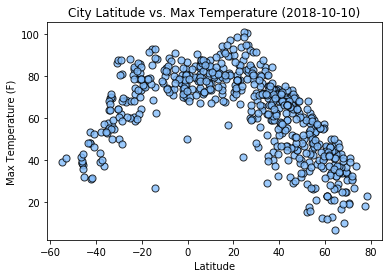

<Figure size 432x288 with 0 Axes>

In [26]:
# define latitude and max temp as the x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Max Temp"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature ({date})")
    
# display scatter plot
plt.show()

# save the image as png
plt.savefig('LatTemp.png', bbox_inches='tight')

#### Latitude vs. Humidity Plot

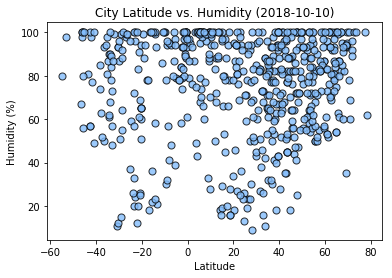

<Figure size 432x288 with 0 Axes>

In [27]:
# define Latitude and humidity as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Humidity"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# display scatter plot
plt.show()

# save the image as a png
plt.savefig('LatHumidity.png', bbox_inches='tight')

#### Latitude vs. Cloudiness Plot

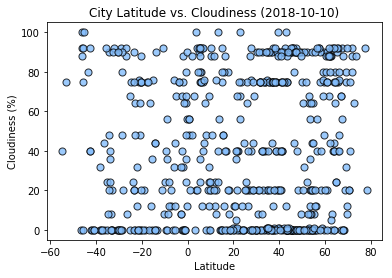

<Figure size 432x288 with 0 Axes>

In [28]:
# define latitude and cloudiness as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Cloudiness"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")
 
# display scatter plot
plt.show()

# save the image as a png
plt.savefig('LatCloudiness.png', bbox_inches='tight')

#### Latitude vs. Wind Speed Plot

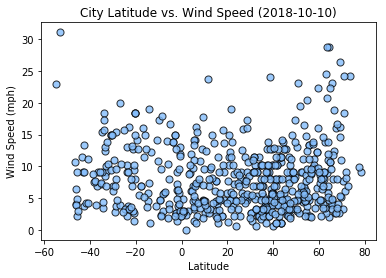

<Figure size 432x288 with 0 Axes>

In [29]:
# define latitude and wind speed as x and y axis values by extracting them from the df
x = all_weather_df["Lat"]
y = all_weather_df["Wind Speed"]
 
# create scatter plot; customize size, color, transparency, edge color and width.
plt.scatter(x, y, s=50, c="#83bdfc", alpha=0.8, edgecolors="black", linewidth=1)
 
# Add title, x axis label, and y axis label
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed ({date})")
 
# display scatter plot
plt.show()

# save the image as a png
plt.savefig('LatWindSpeed.png', bbox_inches='tight')